<a href="https://colab.research.google.com/github/StacyMwende/House_Price_Prediction/blob/master/Week7_IP_HousePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


> As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.



### b) Defining the Metric for Success

> Based on the model that i will create, the company being able to predict prices correctly for the target market will be key. A good model will mean precise prediction and hence the company is able to make profits since the prices will not be exagerated hence people are able to consider such a company compared to other companies which use different types of predictions which could lead to wrong predicts

### c) Understanding the context 

> Overview

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

Within your deliverable you are expected to:

Define the question, the metric for success, the context, experimental design taken. Read and explore the given dataset. Define the appropriateness of the available data to answer the given question. Find and deal with outliers, anomalies, and missing data within the dataset. Perform univariate, bivariate and multivariate analysis recording your observations. Performing regression analysis. Incorporate categorical independent variables into your models. Check for multicollinearity Provide a recommendation based on your analysis. Create residual plots for your models, and assess heteroskedasticity using Barlett's test. Challenge your solution by providing insights on how you can make improvements in model improvement. While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem.

Multiple Linear Regression Quantile Regression Ridge Regression Lasso Regression Elastic Net Regression Remember to go through the rubric so that you can see how you will be assessed on the above regression techniques.

Dataset

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset (Links to an external site.)].

### d) Recording the Experimental Design

> The analysis procedure will follow the CRISP-DM Methodology which includes: Business Understanding -> Data Understanding -> Data Preparation -> Modeling -> Evaluation -> Deployment.

### e) Data Relevance

> Main objective is to study the different factors that affect housing prices and later on design a model for price prediction. From the data provided, most features are well representative to enable creation of a good model

## 2. Reading the Data

In [0]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [0]:
# Loading the Dataset
# Dataset url = http://bit.ly/IndependentProjectWeek7Dataset 
#
df = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#
print('Number of records in House data: ' + str(df.shape))

Number of records in House data: (21613, 20)


In [0]:
# Previewing the top of our dataset
#
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Previewing the bottom of our dataset
# 
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

> Bathroom column does not have the right data type because a house cannot have 2.50 bathrooms. Hence this will be converted to an interger in the data cleaning section.

> The floors column also will be converted to integer from float for easier handling of the values

> The rest of the features have appropriate data for analysis

In [0]:
# Running a summary to get descriptive statistics about the dataset
# 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


> The summary above gives us insights about the dataset. Bathrooms column has the wrong datatype in that a house cannot have point something bathrooms. That needs to be a discrete number. 
> Floors column also reflects the same

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## 5. Tidying the Dataset

In [0]:
# Changing datatypes for different features
# Converting bathroom and floor data type from float to integer
df[['bathrooms', 'floors']] = df[['bathrooms','floors']].apply(np.int64)
print(df.dtypes)

id                 int64
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


> Column datatypes have been changed to integer

In [0]:
# Identifying the Missing Data
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> No missing values in the data

In [0]:
# Checking for Anomalies
#involves looking for duplicates in the dataset
print(df.duplicated().any())
# 
# Printing the number of duplicates
print(df.duplicated().sum())
# This is an indication that there are duplicates in the dataset

True
3


In [0]:
# Since the duplicated entries are only 3, we remove the duplicates
# removing duplicates

df.drop_duplicates(keep='first', inplace = True)

print(df.duplicated().any())

# Duplicates have been removed

False


## 6. Exploratory Analysis

## a) Univariate Analysis

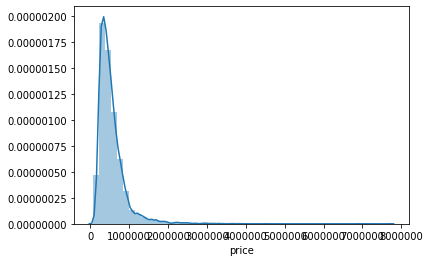

In [0]:
# plot a histogram to visualize the distribution price

import seaborn as sns
sns.distplot(df['price'])

> Price is skewed to the left of the graph which means most house prices range from 500,000 to 2,000,000

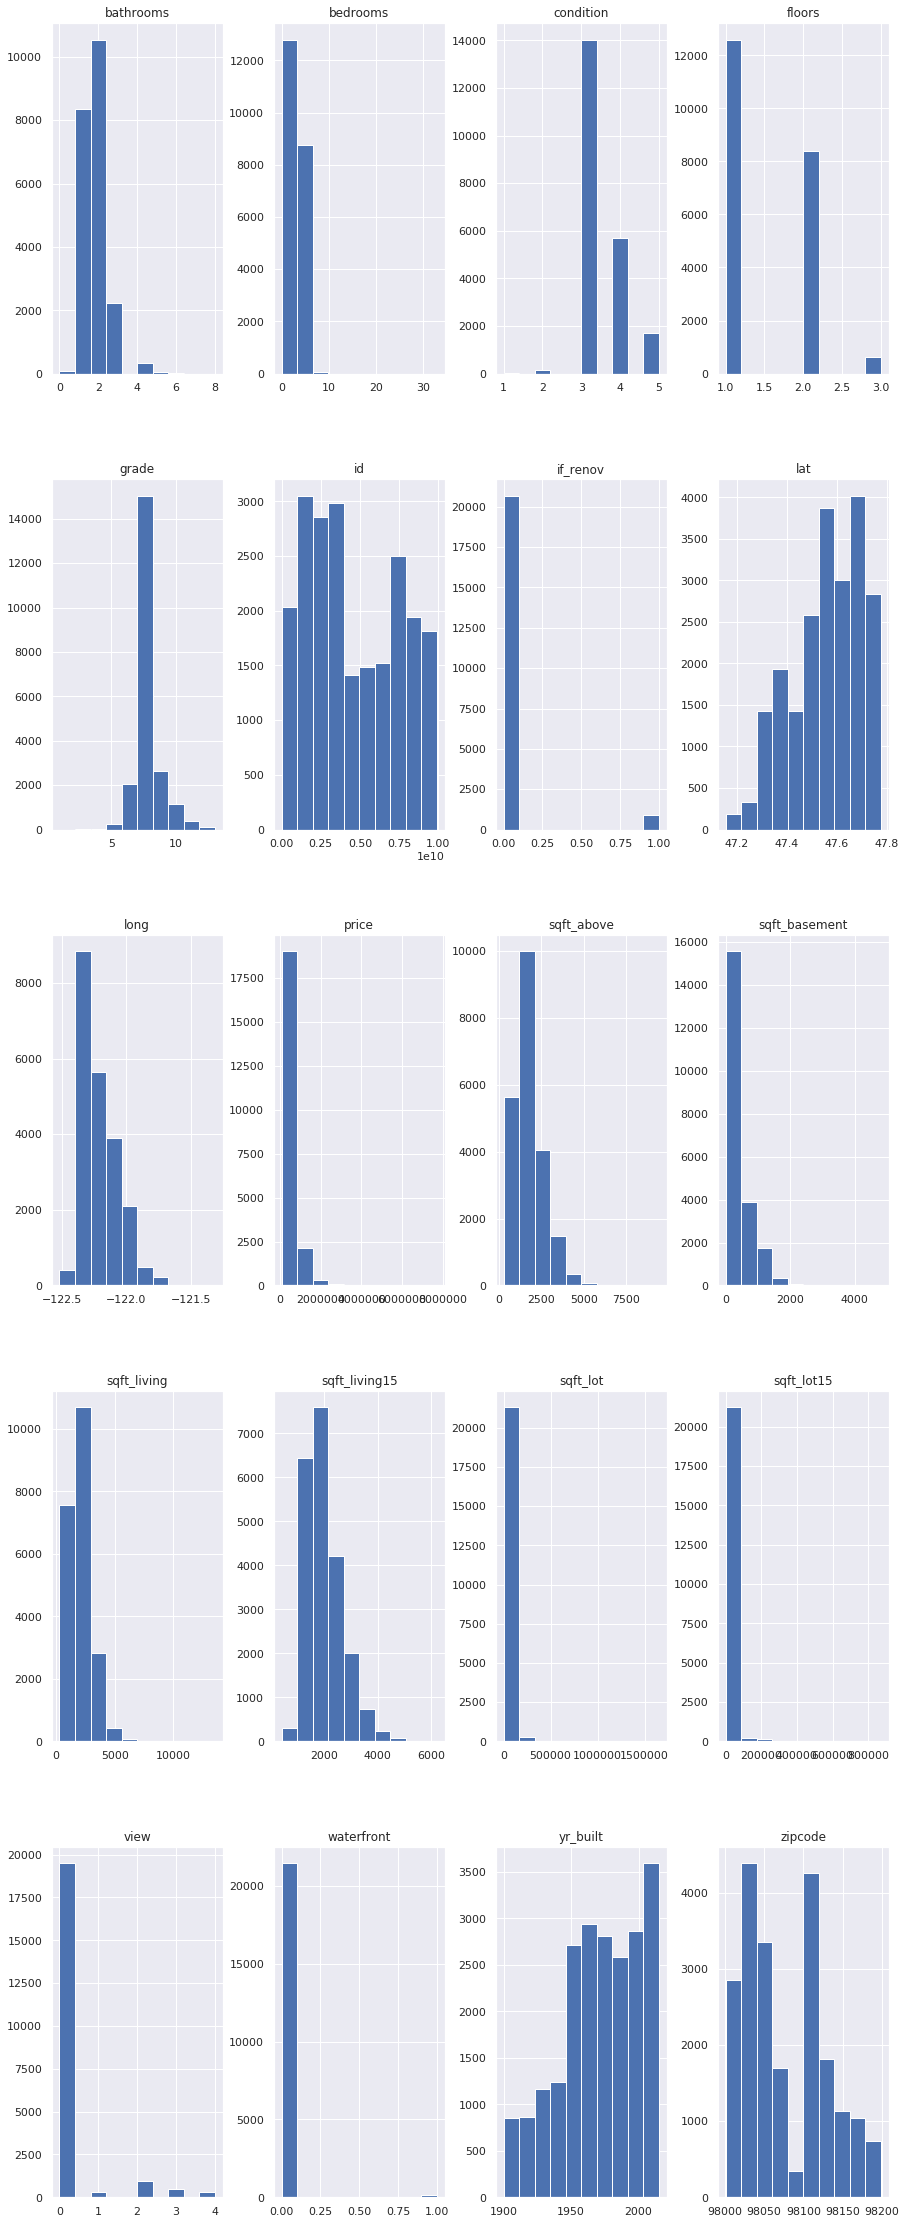

In [0]:
# Univariate Histograms
from matplotlib import pyplot
colms = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
df.hist(figsize=(15,40))
pyplot.show()

> From the univariate analysis above, the data is skewed to the left which means that most houses have 1-3 bedrooms. The bedrooms data is also skewed to the left with most of the houses having room ranging from 1-7

Grade data is normally distributed as per the analysis above. Price,sqft_basement,sqft_above,sqft_living are also skewed to the left

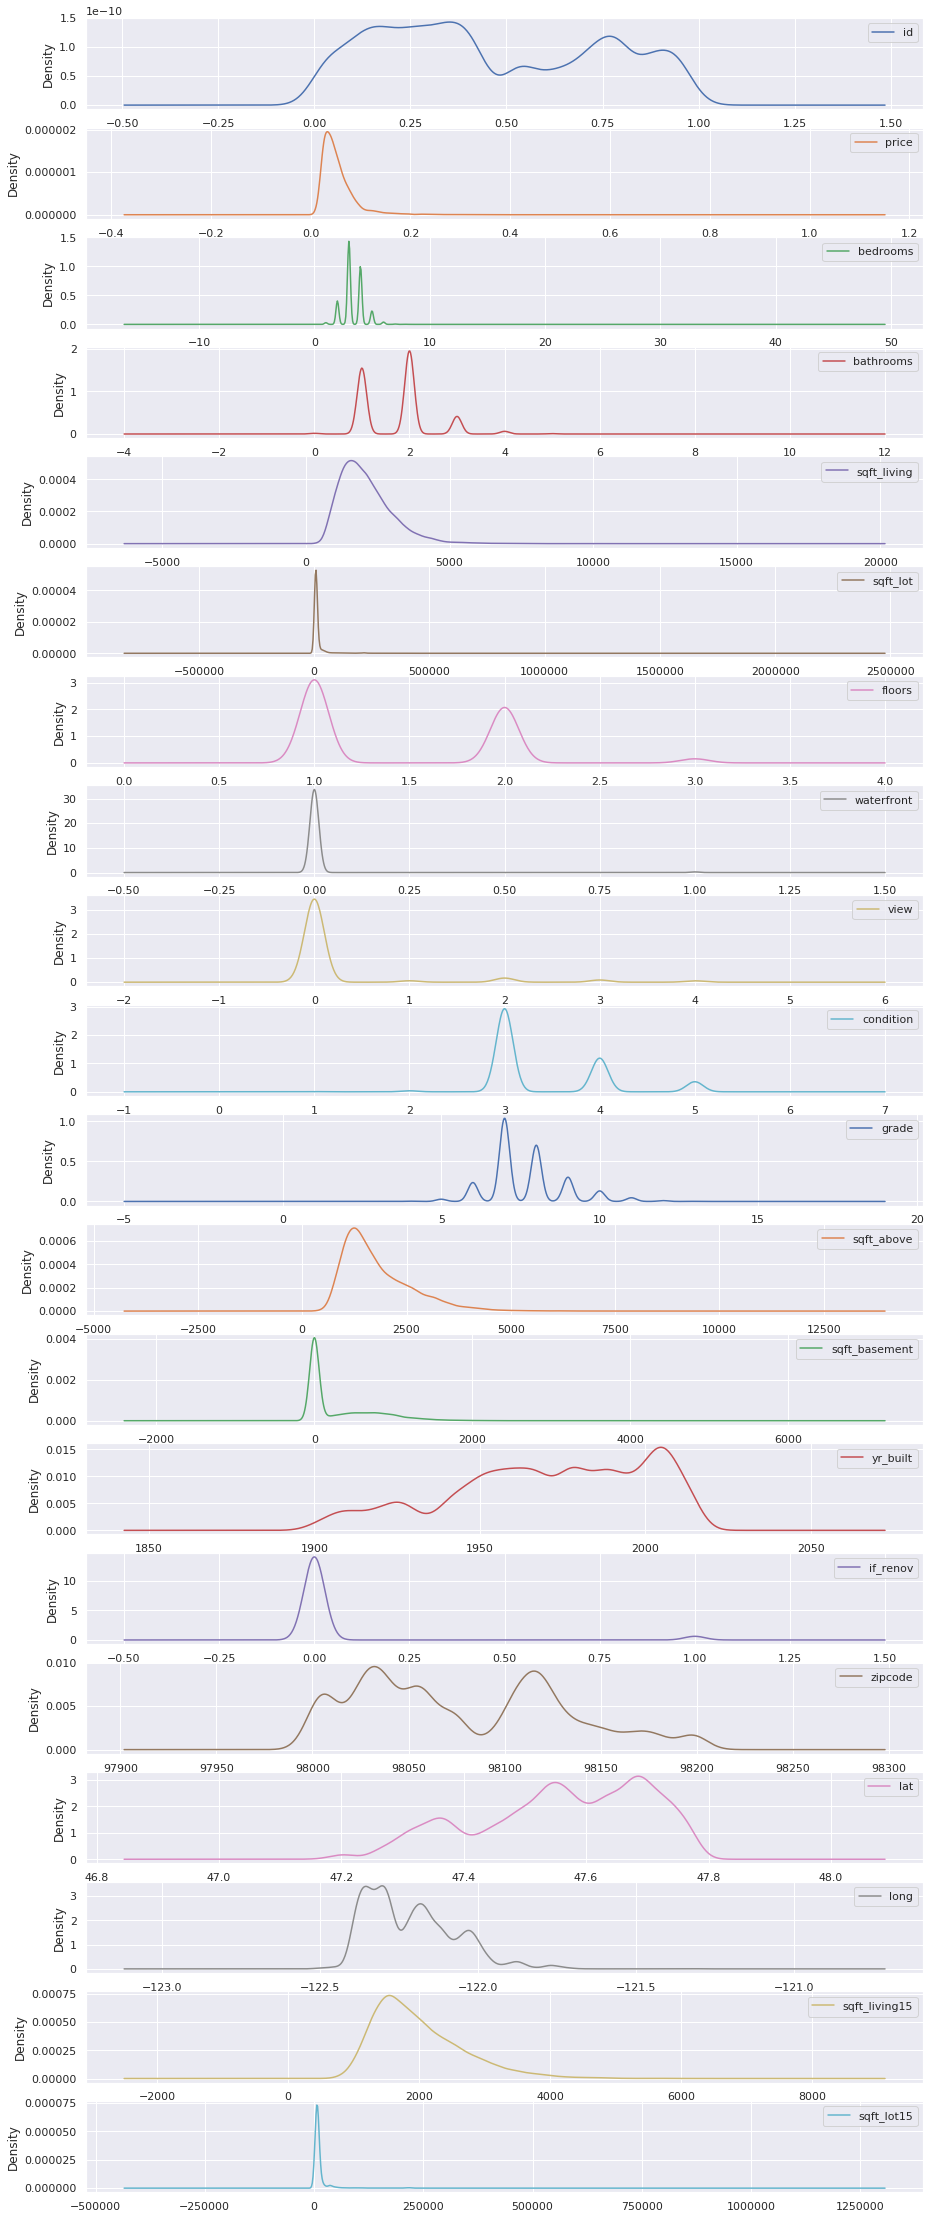

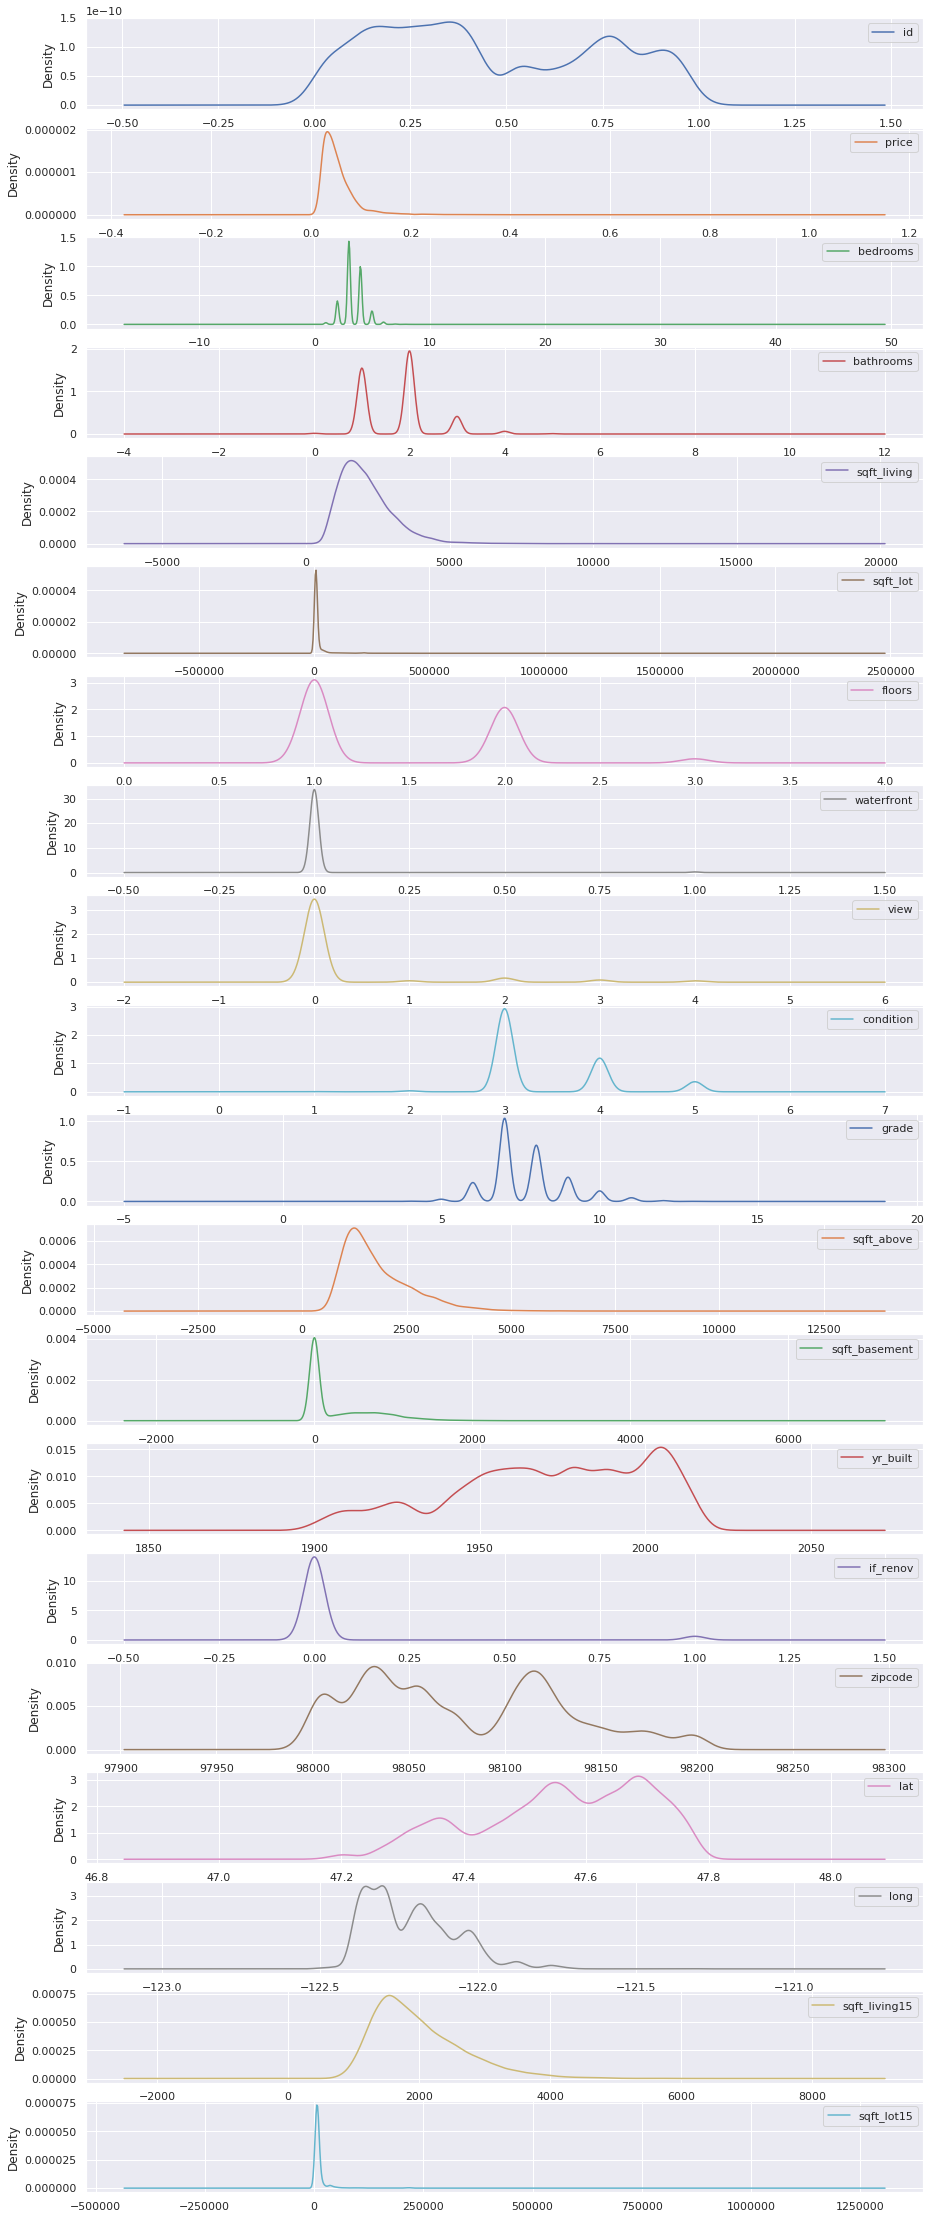

In [152]:
# Density Plots
# Density plots are used to visualize the distribution of data over a period of time

columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
df.plot(kind= 'density' , subplots=True, sharex=False,figsize=(15,40))
pyplot.show(0)

> From the above analysis, most features exhibit a normal distribution with most of the datapoints being in a specific points which means that most of the data lies in such positions

3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


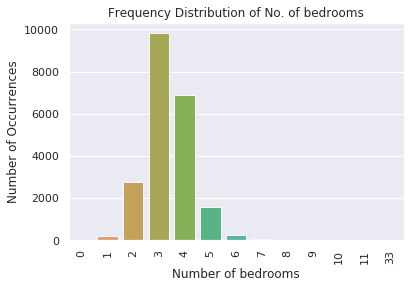

In [0]:
# Frequncy distribution to see how the number of bedrooms are distributed
# 
bedrm_count = df['bedrooms'].value_counts()
print(bedrm_count)
sns.set(style="darkgrid")
sns.barplot(bedrm_count.index, bedrm_count.values, alpha=0.9)
plt.title('Frequency Distribution of No. of bedrooms')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of bedrooms', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> Most houses have 3 bedrooms, followed by houses with 4 bedrooms with 6 bedroom houses being few. There is a house with 33 bedrooms which is an outlier hence will not be dropped since it does not affect the distribution

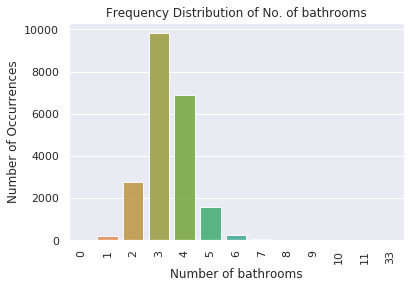

In [0]:
# Frequency distribution to see how the number of bedrooms are distributed
# 
bath_count = df['bathrooms'].value_counts()
sns.set(style="darkgrid")
sns.barplot(bedrm_count.index, bedrm_count.values, alpha=0.9)
plt.title('Frequency Distribution of No. of bathrooms')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of bathrooms', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> Most houses have 2 bathrooms , followed by houses with 1 bathroom with least houses having 4 bedrooms

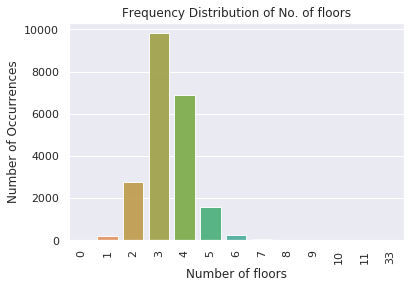

In [0]:
# Frequency distribution to see how the number of floors are distributed

floors_count = df['floors'].value_counts()
sns.set(style="darkgrid")
sns.barplot(bedrm_count.index, bedrm_count.values, alpha=0.9)
plt.title('Frequency Distribution of No. of floors')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of floors', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> Most houses in the analysis have 1 floor, with more than half being 2 floors and a small number of houses having 3 floors

0    21447
1      163
Name: waterfront, dtype: int64


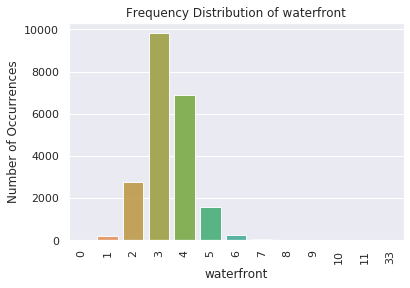

In [0]:
# Frequency distribution of the waterfront column which is boolean
# 
waterfront_count = df['waterfront'].value_counts()
print(waterfront_count)
sns.set(style="darkgrid")
sns.barplot(bedrm_count.index, bedrm_count.values, alpha=0.9)
plt.title('Frequency Distribution of waterfront')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('waterfront', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> Doing a value count of the waterfront column shows that most houses(21447) are not placed infront of a water body with only a few houses(163) having a waterbody view. Hence we will drop this feature since it doesn't affect price as much.

0    19487
2      963
3      509
1      332
4      319
Name: view, dtype: int64


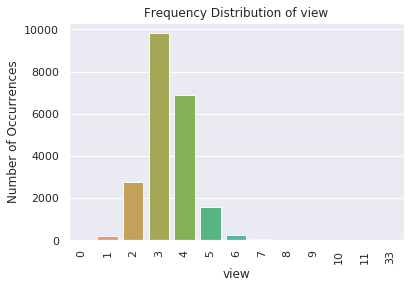

In [0]:
# Frequency distribution of the views column
# 
view_count = df['view'].value_counts()
print(view_count)
sns.set(style="darkgrid")
sns.barplot(bedrm_count.index, bedrm_count.values, alpha=0.9)
plt.title('Frequency Distribution of view')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('view', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> From the analysis above, most houses have not been viewed. More than half of the total number of houses have been viwed more than 4 times and only afew have more than 5 views.

3    14029
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64


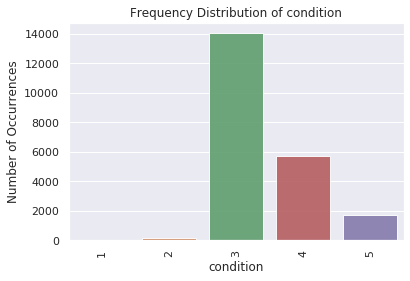

In [0]:
# Frequency distribution of condition column
# 
condition_count = hous_df['condition'].value_counts()
print(condition_count)
sns.set(style="darkgrid")
sns.barplot(condition_count.index,condition_count.values, alpha=0.9)
plt.title('Frequency Distribution of condition')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('condition', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> The range of values (1-5) shows a tally of the condition of the houses with the highest number(5) referring to the houses in a good condition. Most houses lied in position 3, with less than half houses not been in a not so bad condition

7     8981
8     6066
9     2614
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


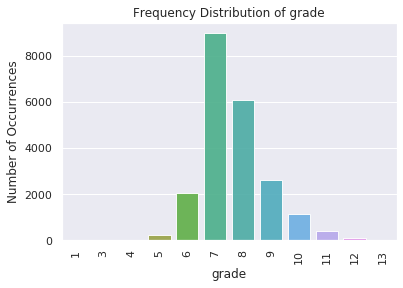

In [0]:
# Frequency distribution of grade column
# 
grade_count = hous_df['grade'].value_counts()
print(grade_count)
sns.set(style="darkgrid")
sns.barplot(grade_count.index,grade_count.values, alpha=0.9)
plt.title('Frequency Distribution of grade')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('grade', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> The analysis shows that the grade column is normally distributed and that most of the houses were graded at 7 followed by 8 and not so many houses got a high ranking in the grading

## 6. Feature Engineering

In [0]:
# Getting an if renovated column
# 
df.loc[df['yr_renovated'] > 1, 'yr_renovated'] = 1

In [0]:
# Renaming the year renovated column
# 
df.rename({"yr_renovated" : "if_renov"},axis=1, inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,if_renov,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


0    20699
1      914
Name: if_renov, dtype: int64


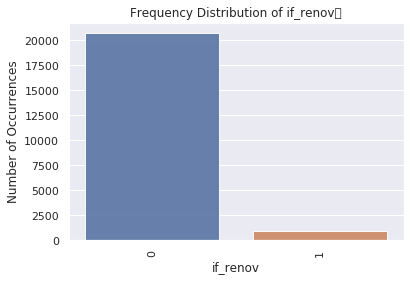

In [0]:
# Frequency distribution of the if_renov column
# 
import matplotlib.pyplot as plt

if_renov_count = df['if_renov'].value_counts()
print(if_renov_count)
sns.set(style="darkgrid")
sns.barplot(if_renov_count.index,if_renov_count.values, alpha=0.9)
plt.title('Frequency Distribution of if_renov	')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('if_renov', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> From the analysis above, most houses were not renovated

In [0]:
# Dropping unnecessary columns
# Getting the final dataframe for analysis
 hous_df = df.drop(['id', 'lat', 'long','sqft_living15', 'sqft_lot15'], axis=1)
 hous_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,if_renov,zipcode
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1,98125
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074


## b) Bivariate Analysis

In [0]:
 #we use the pairplot() function of the seaborn package to plot the bivariate distributions

sns.pairplot(hous_df, kind="reg",height=3.5,aspect=1, markers="+")

> Pairplots plot the relationship betweeen a feature and other features in the dataset. Most of the features have a linear relationship with each other The zipcode shows some negative relationship with a couple of variables which means that a change of either brings a negative effect on the other.

## c) Multivariate Analysis

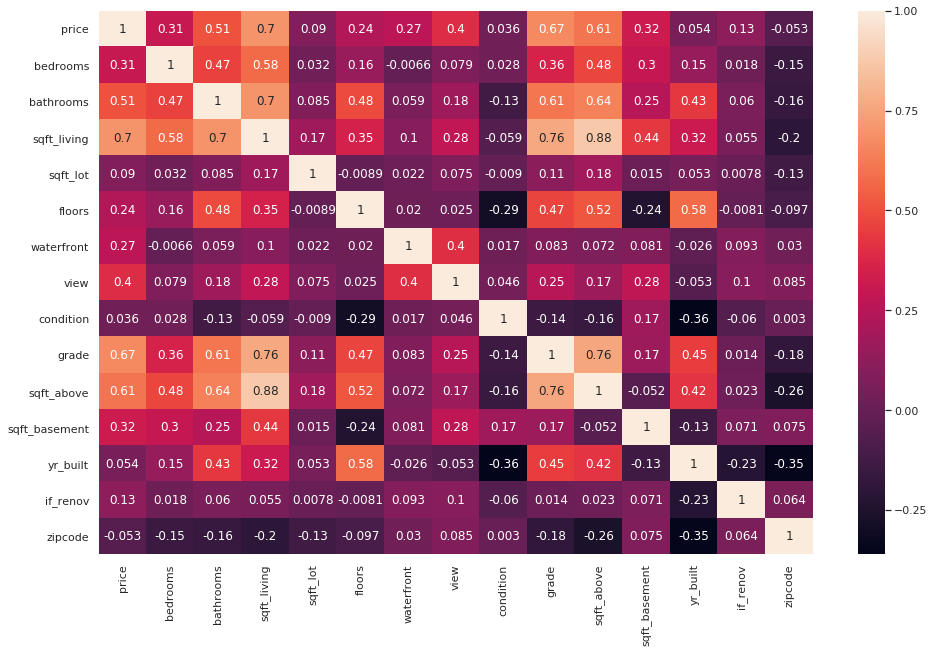

In [0]:
# Plotting a heatmap to see the correlation bewteen all the variables
# 
plt.figure(figsize=(16,10))
sns.heatmap(hous_df.corr(), annot=True)
plt.show()

> There's a high correlation between price and sqft_living (Square feet area of living area) which means an increase in living area positively affects price of a house.

> A positive correlation is also observed between price and the sqft_above and grade. This means that an incease in the 2 variables affects price as well. Price and zipcode exhibit a negative correlation. In that zipcode doesn't affect price in a positive way

> There is a negative correlation between the number of bedrooms and waterfront. This means that the variables are not related in anyway.

**Checking for multicollinearity**

In [0]:
# Getting a correlation between the variables
# 
corr = hous_df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,if_renov,zipcode
price,1.000000,0.308346,0.510096,0.702046,0.089658,0.237215,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126163,-0.053162
bedrooms,0.308346,1.000000,0.467519,0.576674,0.031699,0.155663,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018406,-0.152721
bathrooms,0.510096,0.467519,1.000000,0.697914,0.085313,0.484886,0.058799,0.177497,-0.125962,0.606661,0.639963,0.250920,0.433608,0.060253,-0.159755
sqft_living,0.702046,0.576674,0.697914,1.000000,0.172830,0.353327,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055045,-0.199435
sqft_lot,0.089658,0.031699,0.085313,0.172830,1.000000,-0.008919,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007780,-0.129611
floors,0.237215,0.155663,0.484886,0.353327,-0.008919,1.000000,0.019654,0.024528,-0.293188,0.472577,0.517903,-0.235802,0.578663,-0.008054,-0.096645
waterfront,0.266332,-0.006583,0.058799,0.103820,0.021601,0.019654,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.093360,0.030277
view,0.397466,0.079433,0.177497,0.284641,0.074753,0.024528,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103347,0.084838
condition,0.036397,0.028422,-0.125962,-0.058768,-0.008967,-0.293188,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060386,0.002962
grade,0.667478,0.357003,0.606661,0.762719,0.113644,0.472577,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.013965,-0.184795


> A high positive correlation is where the corr value gets to 1. This is observed between a variable and itself which makes sense.e.g: Price has high positive correlation with itself. 

> A negative correlation is when we have a negative sign before the value. e.g:Price and zipcode have a negative correlation.

> Let's use these correlations to compute the VIF score for each variable. We create a new dataframe with the inverse of the matrix above.

In [0]:
# Creating a dataframe of the VIF
VIF = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
VIF

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,if_renov,zipcode
price,2.892403,0.279208,-0.309426,-5.928828e-01,0.085576,-0.097503,-0.392211,-0.274043,-0.100252,-1.158493,-5.576254e-01,-3.059574e-01,0.829366,-0.024803,0.017580
bedrooms,0.279208,1.642137,-0.322179,-8.459772e-01,0.123532,0.059156,0.023504,0.084120,-0.074693,0.183473,-2.635434e-01,-1.759241e-01,0.115554,0.021756,0.076349
bathrooms,-0.309426,-0.322179,2.432752,-1.454563e+00,-0.002003,-0.526954,0.054986,0.010127,-0.033039,-0.006604,5.326459e-01,7.245835e-02,-0.497083,-0.159899,-0.050545
sqft_living,-0.598131,-0.845896,-1.456453,1.805120e+13,-0.237013,0.117451,0.055479,-0.056923,-0.358663,-1.860181,-1.627533e+13,-8.698312e+12,0.480566,-0.072517,0.078079
sqft_lot,0.085576,0.123532,-0.002003,-2.368887e-01,1.073142,0.145256,0.005490,-0.066387,0.004417,0.042191,-1.668793e-01,5.096941e-02,-0.000221,-0.007008,0.095242
floors,-0.097503,0.059156,-0.526954,1.195213e-01,0.145256,2.120558,0.004302,-0.005138,0.079687,-0.215791,-3.826615e-01,5.165717e-01,-0.822297,-0.134119,-0.287486
waterfront,-0.392211,0.023504,0.054986,5.620432e-02,0.005490,0.004302,1.255341,-0.451801,-0.001375,0.221211,1.723119e-02,5.735000e-02,-0.130423,-0.065142,0.004254
view,-0.274043,0.084120,0.010127,-5.740303e-02,-0.066387,-0.005138,-0.451801,1.414568,-0.011055,-0.147480,2.385113e-02,-2.231545e-01,0.063938,-0.029977,-0.107244
condition,-0.100252,-0.074693,-0.033039,-3.584210e-01,0.004417,0.079687,-0.001375,-0.011055,1.242106,0.020167,4.158114e-01,8.004825e-02,0.475194,0.193008,0.170769
grade,-1.158493,0.183473,-0.006604,-1.858937e+00,0.042191,-0.215791,0.221211,-0.147480,0.020167,3.441314,1.059789e-01,4.235410e-01,-0.794181,-0.016374,-0.057317


> Variance Inflation Factor (VIF) is a measure of colinearity between the predictor variables.

> The VIF score for each variable is found alongside the downwards sloping diagonal. Price has a VIF score of 2.892403, bedrooms has a score of 1.642137	etc.

> A value of 1 means that the predictor is not correlated with other variables
> Any value above 5 would be a problem but from the analysis above, none of the features have such a value

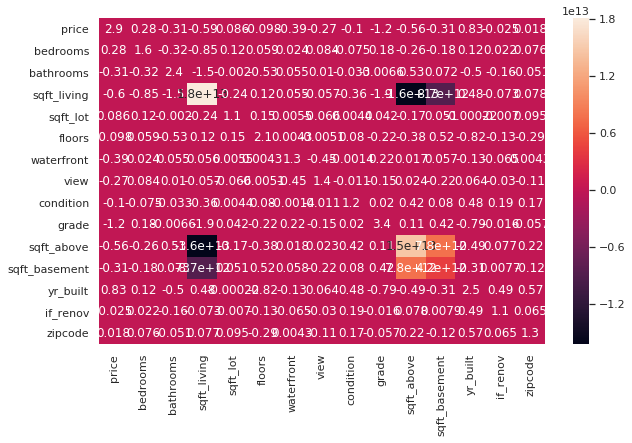

In [0]:
# Creating a heatmap to visualize the VIF calculated above
# 
plt.figure(figsize = (10, 6))
sns.heatmap(VIF, annot = True)
plt.show()

## 7. Implementing the Solution


> I'll start by creating a baseline model using Linear regression to use it for comparison with other models

**Baseline model using Linear regression**

In [0]:
# Dividing data in a feature set and corresponding labels
# x is the independent variable
# y is the target variable(price)
# 
X = hous_df.drop(columns = ['price'], axis=1)
y = df['price']

# The code above separates the predictor variables(x) from the target variable(y) which is price

In [0]:
# importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import scipy as sp

# Creating a baseline model using linear regression
# 
#  Split data to train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)
#
# Standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit our model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)



542893.1038172352
[ -34539.01529512   39191.20449092   81144.87104777  -11170.53634582
   13433.09403328   53751.10072398   34991.82966191   12882.75394525
  144922.00212181   69815.18822356   37955.09112232 -105695.88965386
    2966.16948396    -370.58287113]


In [0]:
# Making Predictions to see how the model functions

y_pred = regressor.predict(X_test)
# To compare the actual output values for X_test with the predicted values
# 
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred })
comparison_df.describe()

,Actual,Predicted
count,4.323000e+03,4.323000e+03
mean,5.293396e+05,5.351267e+05
std,3.451267e+05,2.893204e+05
min,8.900000e+04,-3.725765e+05
25%,3.170000e+05,3.359534e+05
50%,4.400000e+05,4.721151e+05
75%,6.317500e+05,6.714577e+05
max,5.570000e+06,2.417980e+06


In [0]:
# Model evaluation

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 139468.3083938954
Mean Squared Error: 44216921338.1094
Root Mean Squared Error: 210278.1998641547


> From the analysis above, RMSE exhibits a lower value which is good compared to the rest

In [101]:
# checking the accuracy
# importing appropriate library
from sklearn.metrics import r2_score

print("Linear R2 score is ",round(r2_score(y_test, y_pred),2))

Linear R2 score is  0.65


## a) Multiple Linear Regression

> Using Polynomial Regression

>polynomial regression is a special type of multiple regression and hence we will perform polynomial regression to create the model

In [60]:
#  Split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)
#
# Standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 2)
X_pol = poly_features.fit_transform(X_train)

# Fitting the polynomial model
PolyReg = LinearRegression()
PolyReg.fit(X_pol, y_train)

# Making predictions
y_pred_ply = PolyReg.predict(poly_features.fit_transform(X_test))

# Measuring the accuracy of the model

from sklearn import metrics
 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ply))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ply))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ply)))

Mean Absolute Error: 121629.76012028684
Mean Squared Error: 33856576685.211426
Root Mean Squared Error: 184001.56707270574


> Comparing the RMSE of **184001.5670** from Polynomial with RMSE of **210278.1999** from Linear regression, we see that the value went down which means that polynomial reg fitted the data better.

















In [0]:
# Making predictions to see model performance

poly_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ply})
poly_df

,Actual,Predicted
17384,297000.0,426508.0
722,1580000.0,1848076.0
2680,562100.0,542860.0
18754,631500.0,555468.0
14554,780000.0,680076.0
...,...,...
5427,844000.0,894412.0
16547,335500.0,301628.0
4585,369950.0,295116.0
17762,300000.0,325548.0


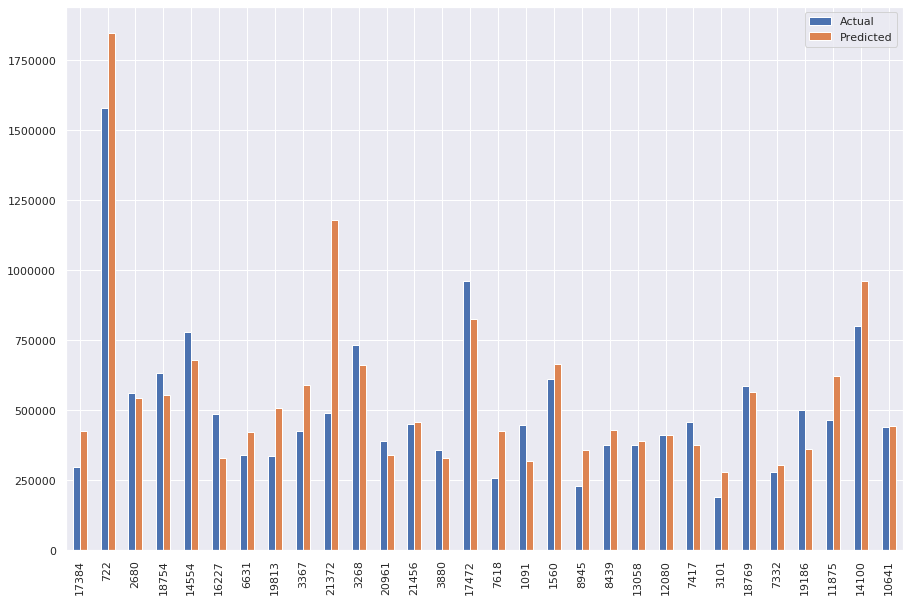

In [0]:
# A visualization of the above dataframe

poly_df[:30].plot(figsize=(15,10),kind='bar')
plt.show()

> Most predictions are close to the actual value which means that the model is good

In [0]:
# Checking for accuracy of the model to compare with the baseline model.

print("Polynomial R2 score is ",round(r2_score(y_test, y_pred_ply),2))

Linear R2 score is  0.72


In [130]:
hous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null int64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
if_renov         21613 non-null int64
zipcode          21613 non-null int64
dtypes: float64(1), int64(14)
memory usage: 2.5 MB


> We observe an improvement of the model from a score of 0.65 to 0.72 fro the polynomial. This means that polynomial models makes good predictions

## b) Quantile Regression

In [133]:
#Separating training and testing datasets

Q = hous_df.drop(['sqft_living','condition','grade','waterfront','if_renov'], axis=1) 
y = hous_df['price']    
# 9:49
from sklearn.model_selection import train_test_split
Q_train, Q_test, y_train, y_test = train_test_split(Q,y, test_size=0.2, random_state=24)
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ Q', hous_df)
res = mod.fit(q=.8)
  # Then print out the summary of our model
  #
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   3.630e-06
Method:                 Least Squares   Sparsity:                    6.887e-05
Date:                Mon, 27 Jan 2020   No. Observations:                21613
Time:                        07:21:41   Df Residuals:                    21602
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.673e-10   1.87e-10      0.894      0.371   -1.99e-10    5.34e-10
Q[0]           1.0000   8.82e-13   1.13e+12      0.000       1.000       1.000
Q[1]       -6.026e-07   3.97e-07     -1.518      0.129   -1.38e-06    1.76e-07
Q[2]        5.439e-07   5.84e-07      0.932      0.3

In [149]:
# Making Predictions
# 
pred = res.predict(Q)
# To compare the actual output values for Q_test with the predicted values
# 
Q1 = pd.DataFrame({'Actual': y, 'Predicted': pred})
print(Q1.sample(4))

from sklearn.metrics import r2_score
z = r2_score(y, pred)
print("Polynomial R2 score is " + str(z))

         Actual      Predicted
2710   780000.0  779999.999991
10424  109000.0  108999.999975
21011  515000.0  514999.999981
5985   441000.0  440999.999993
Polynomial R2 score is 1.0


> A score of 1 means that the data predidcted fits perfectly.

## c) Ridge Regression

> Ridge regression is a type regularization is a process of penalizing coefficients of variables either by removing them and or reducing their impact. 
Ridge regression reduces the effect of problematic variables close to zero but never fully removes them. 

In [0]:
R = hous_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'if_renov', 'zipcode']]
y = hous_df['price']    

In [0]:
# creating ridge model with hyperparameter tuning
#  Split data to train and test data
R_train, R_test, y_train, y_test = train_test_split(R,y, test_size=.2, random_state=0)

# importing appropriate libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

**Code explanation**

> In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization(hyperparameter) that is used in ridge regression. 
Determining the value of a hyperparameter requires the use of a grid. 

> In the code above, we first create our ridge model and indicate normalization in order to get better estimates then get grid that we will use. 

> Alpha is hyperparameter we are trying to set. 
The log space is the range of values we want to test. 
> cv is the number of folds to develop for the cross-validation.

In [88]:
# We use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength

search.fit(R_train,y_train)
print(search.best_params_)
{'alpha': 0.001}
print(abs(search.best_score_))

# The best_params_ tells us what to set alpha too which in this case is 0.001. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 47161040559.118385 is worse than what the baseline model was. 

{'alpha': 0.001}
48219711288.22473


In [89]:
# Fitting the model

ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(R_train,y_train)
y_pred_Rg = ridge.predict(R_test)

# Measuring the accuracy of the model 
ridge_model =np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred = ridge.predict(R_test)))
ridge_model


205321.15444873163

> From the analysis above, we can observe that the ridge model does not perform well compares to the baseline model.
> This means that it's not the best model the company should consider

## c) Lasso Regression

> Other than Lasso performing regulaziration, it also does feature selection.

> It penalizes the absolute size of the regression coefficient.

In [91]:
# Setting up our X and y datasets
#
L = hous_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'if_renov', 'zipcode']]
y = hous_df['price']

# Importing linear models
from sklearn.linear_model import Lasso,LinearRegression
from sklearn import linear_model
# Splitting data to train and test data
L_train, L_test, y_train, y_test = train_test_split(L, y, test_size=0.2, random_state=0)

# Creating lasso object
lasso = linear_model.Lasso() 

# Fitting the models
lasso.fit(L_train, y_train) 

# Making prediction
y_pred_Ls = lasso.predict(L_test)

# Print scores
print("lasso score:", lasso.score(L_train, y_train)) 

# printing the RMSE

np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred = ridge.predict(R_test)))

lasso score: 0.6557419028954068


205321.15444873163

> We use the whole dataset without splitting and set **Alpha = 1** 

> That yields a bigger RMSE compared to the linear RMSE.

> We proceed to get a viable alpha using crossvalidation

**hyperparameter tuning using crossvalidation**

In [96]:
# Splitting data to train and test data
L_train, L_test, y_train, y_test = train_test_split(L, y, test_size=0.2, random_state=0)

# choosing the regularization parameter with the help of GridSearch.
params = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, params, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(L_train, y_train) 
linear.fit(L_train, y_train) 
y_pred_Ls1 = gridlasso.predict(L_test)
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(L_test, y_test))
print("lasso MSE:",np.sqrt(mean_squared_error(y_test, gridlasso.predict(L_test))))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)


lasso best parameters: {'alpha': 4.5}
lasso score: 0.6460024144727341
lasso MSE: 205318.71115098483
lasso best estimator coef: [-3.66186047e+04  5.32977171e+04  3.08784561e+02 -2.64307794e-01
  2.42051826e+04  5.97032365e+05  4.54057670e+04  1.97968507e+04
  1.23184404e+05 -1.36944993e+02 -1.35325799e+02 -3.58490506e+03
  1.43957892e+04 -6.90241519e+00]


> Upon involving crossvalidation, the model improves by a good percentage in that checking the prediction and visulization shows a close range prediction compared to Polynomial regression

In [97]:
lasso_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_Ls1})
lasso_df

,Actual,Predicted
17384,297000.0,2.751394e+05
722,1580000.0,1.503769e+06
2680,562100.0,4.798377e+05
18754,631500.0,5.761204e+05
14554,780000.0,8.558305e+05
...,...,...
5427,844000.0,9.616209e+05
16547,335500.0,2.638398e+05
4585,369950.0,2.985608e+05
17762,300000.0,2.346956e+05


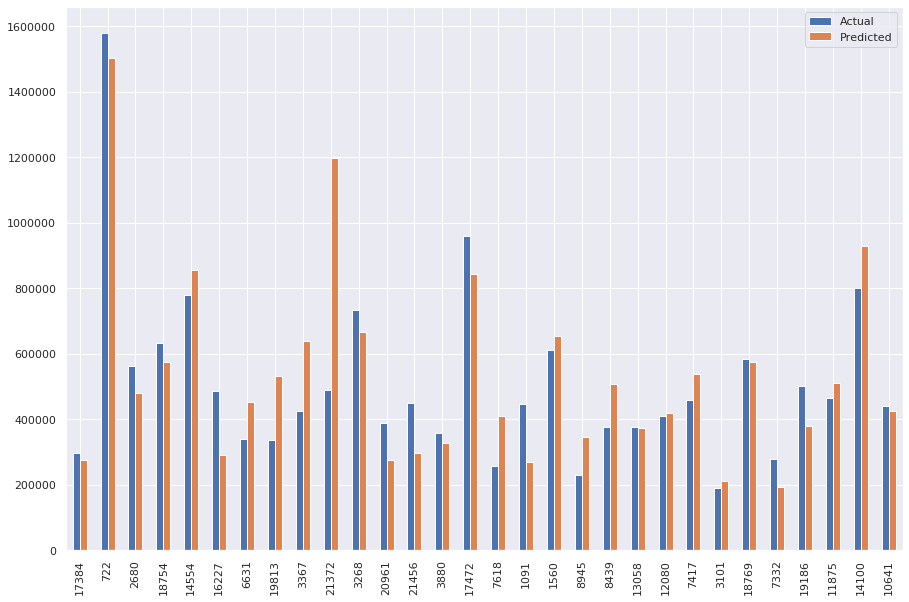

In [102]:
# A visualization of the lasso prediction dataframe

lasso_df[:30].plot(figsize=(15,10),kind='bar')
plt.show()

In [99]:
print("Lasso R2 score is ",round(r2_score(y_test, y_pred_Ls1),4))

Lasso R2 score is  0.646


## e) Elastic Net Regression

> Elastic net is a combination of both Lasso and ridge regression.
> It can remove weak variables all together as with lasso or reduce them to close to 0 as with ridge

In [0]:
#import necessary library
from sklearn.linear_model import ElasticNet

# Loading X and y data

D = hous_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'if_renov', 'zipcode']]
y = hous_df['price']

# Splitting data to train and test data
D_train, D_test, y_train, y_test = train_test_split(D, y, test_size=0.2, random_state=0)

In [108]:
# We start by normalizing the data followed by a grid search

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
                                                  'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(D_train,y_train)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


48265558938.39576

In [116]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 48265558938.39576. This is above our baseline model of MSE 44216921338.1094 for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 

elastic= ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(D_train,y_train)
y_pred_el = elastic.predict(D_test)
elas_model=(np.sqrt(mean_squared_error(y_test ,elastic.predict(D_test))))
print(elas_model)
# print('Root Mean Squared Error_Linear:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

# print("lasso MSE:",np.sqrt(mean_squared_error(y_test, gridlasso.predict(L_test))))

266286.8148329398


In [118]:
# checking the accuracy of the model.
print("Ridge R2 score is ",round(r2_score(y_test, y_pred_el),3))

Ridge R2 score is  0.405


> A score of 40% is quite low compared to other models. This means that elastic net is not a good predictor

## 8. Challenging the solution

> From the above modelling polynomial regression proved to work well compared to other models in prediction in that the predictions variance wasn't big.






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> From the analysis above, better predictions could have been done if more features where provided

### b). Do we need other data to answer our question?

> More data should be provided for better predictions

### c). Did we have the right question?

> The provided question was qood only that the data was not enough to answer the question